In [ ]:
from torchvision.models import resnet18
from torchvision.datasets import MNIST
from torchvision import transforms
from torch import nn
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision

!pip install -q captum
from captum.attr import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
model = torch.load('drive/MyDrive/mnist-0123-only')
model.eval()
model.zero_grad()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
train_ds = MNIST("mnist", train=True, download=True, transform=transforms.ToTensor())
test_ds = MNIST("mnist", train=False, download=True, transform=transforms.ToTensor())
#train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
#test_dl = DataLoader(test_ds, batch_size=64)

In [ ]:
# restricted training set
# isolated_indexes = (train_ds.targets == 0) | (train_ds.targets == 1)
# train_ds.targets = train_ds.targets[isolated_indexes]
# train_ds.data = train_ds.data[isolated_indexes]

# restricted test set
isolated_indexes = (test_ds.targets == 0) | (test_ds.targets == 1) | (test_ds.targets == 2) | (test_ds.targets == 3)
test_ds.targets = test_ds.targets[isolated_indexes]
test_ds.data = test_ds.data[isolated_indexes]

In [ ]:
test_dl = DataLoader(test_ds, batch_size=500, shuffle=True, )

In [ ]:
images, labels = iter(test_dl).next()

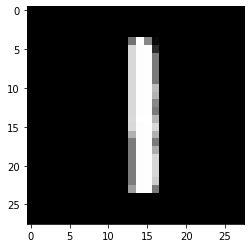

In [ ]:
import matplotlib.pyplot as plt
image = images[0]
plt.imshow(image.squeeze(), cmap='gray')

In [ ]:
ig = IntegratedGradients(model)
attributions = ig.attribute(images, target=labels, baselines = images * 0)

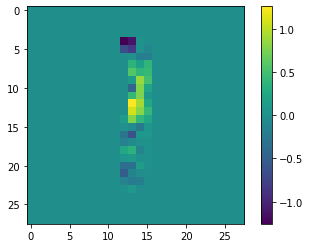

In [ ]:
attribution = attributions[10]
plt.imshow(attribution.squeeze())
plt.colorbar()

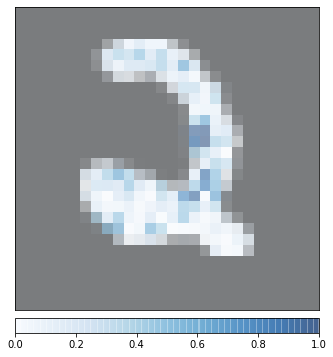

(<Figure size 432x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f10cb6728d0>)

In [ ]:
import numpy as np
from captum.attr import visualization as viz
viz.visualize_image_attr(np.transpose(attributions[3].numpy(), (1,2,0)), np.transpose(images[3].numpy(), (1,2,0)), method="blended_heat_map", show_colorbar=True)

In [ ]:
!pip install -q umap-learn[plot]

     |████████████████████████████████| 86 kB 1.4 MB/s 
     |████████████████████████████████| 1.1 MB 10.8 MB/s 
     |████████████████████████████████| 15.8 MB 34.2 MB/s 
     |████████████████████████████████| 76 kB 4.1 MB/s 
     |████████████████████████████████| 134 kB 44.3 MB/s 
     |████████████████████████████████| 837 kB 35.7 MB/s 
     |████████████████████████████████| 830 kB 60.5 MB/s 
     |████████████████████████████████| 822 kB 40.0 MB/s 
     |████████████████████████████████| 802 kB 44.2 MB/s 
     |████████████████████████████████| 802 kB 51.2 MB/s 
     |████████████████████████████████| 793 kB 42.4 MB/s 
     |████████████████████████████████| 793 kB 49.7 MB/s 
     |████████████████████████████████| 791 kB 52.6 MB/s 
     |████████████████████████████████| 786 kB 39.5 MB/s 
     |████████████████████████████████| 779 kB 41.7 MB/s 
     |████████████████████████████████| 778 kB 41.2 MB/s 
     |████████████████████████████████| 776 kB 48.2 MB/s 
     |███████████

In [ ]:
import umap
import umap.plot
mapper = umap.UMAP(n_neighbors = 20,min_dist=0.5).fit(torch.reshape(attributions.squeeze(), (500, 784)))

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


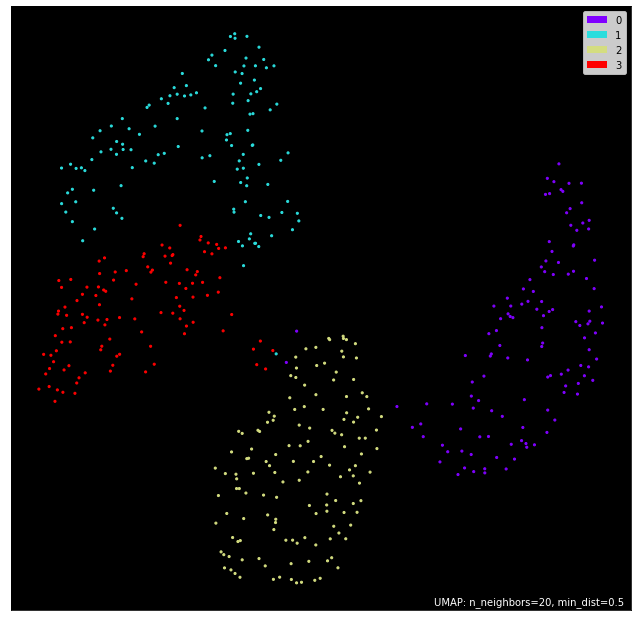

In [ ]:
umap.plot.points(mapper, labels=labels, theme="fire")